    Таблица visits (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя
    
    Таблица orders (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка
    
    Таблица costs (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

    LTV -  общая сумма денег, которую один клиент в среднем приносит компании (выручка еа текущий день / размер когорты) (1, 3, 7, 14 дней)
    ROI - окупаемость LTV/САС
    САС - стоимость привлечения одного клиента ( Расход на рекламу / размер когорты )
    ARPU - средняя выручка с пользователя 
    ARPPU - средняя выручка с платящего пользователя
    удержание 
    CTR - показов рекламного баннера в клики называют(конверсия клики/показы)
    CR - переход пользователя от одного состояния в другое(конверсия)
    DAU - количество уникальных пользователей за день 
    WAU - количество уникальных пользователей за неделю 
    MAU - количество уникальных пользователей за месяц 
    ASL - Средняя продолжительность сессии 
    CPM -  стоимость тысячи показов рекламного объявления.
    RPM - доход за тысячу показов.
    СPC - оплата за каждого пользователя, кликнувшего на рекламное объявление, то есть перешедшего на сайт.
    CPL - оплата за каждого пользователя, оставившего свои контакты
    CPA - оплата за определённое действие, совершённое пользователем. Например, за покупку.

Загружаем библиотеки

In [169]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

Загружаем таблицы

In [2]:
job = 'C:\\Users\\a.vechkanov\\Desktop\\Госты, Литература\\Остальное\\Data analitics\\Проекты\\Продуктовые метрики\\'
home = 'C:\\Users\\Александр\\OneDrive\\Рабочий стол\\Python\\ЯндексПрактикум\\Project\\Продуктовые метрики\\'
try:   
    visits = pd.read_csv(
        job+'visits_info_short.csv'
    )
    
    orders = pd.read_csv(
        job+'orders_info_short.csv'
    )
        
    costs = pd.read_csv(
        job+'costs_info_short.csv'
    )
    
except:
    visits = pd.read_csv(
        home+'visits_info_short.csv'
    )
    orders = pd.read_csv(
        home+'orders_info_short.csv'
    )
    costs = pd.read_csv(
        home+'costs_info_short.csv'
    )
    

Подготовим наши данные к работе

In [3]:
names = ['visits', 'orders', 'costs']
tables = [visits, orders, costs]
for table,name in zip(tables, names):
    print('ТАБЛИЦА: ',name)
    display(table.shape)
    display(table.sample(3))
    table.info()
    print('\n')

ТАБЛИЦА:  visits


(309901, 6)

,User Id,Region,Device,Channel,Session Start,Session End
200076,490589547048,United States,iPhone,FaceBoom,2019-10-24 23:16:34,2019-10-25 00:11:42
163049,941315676371,United States,Mac,FaceBoom,2019-09-28 19:46:11,2019-09-28 19:49:25
268012,105774604055,UK,Android,organic,2019-08-25 19:44:45,2019-08-25 19:51:32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


ТАБЛИЦА:  orders


(40212, 3)

,User Id,Event Dt,Revenue
27732,789773833675,2019-10-30 04:31:06,4.99
27139,343376400350,2019-10-27 18:18:19,4.99
1794,739141354592,2019-05-29 05:02:02,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


ТАБЛИЦА:  costs


(1800, 3)

,dt,Channel,costs
1209,2019-09-07,LeapBob,9.45
1509,2019-07-09,WahooNetBanner,27.60
933,2019-06-03,AdNonSense,15.75


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB




Пропусков нет, проверим данные на дубликаты

In [4]:
for table in tables:
    print(table.duplicated().sum())

0
0
0


Приведем таблицы к удобному для работы виду 

In [5]:
visits.columns

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

In [6]:
visits = visits.rename(
    columns = {
        visits.columns[0]:'user_id',
        visits.columns[1]:'region',
        visits.columns[2]:'device',
        visits.columns[3]:'channel',
        visits.columns[4]:'session_start',
        visits.columns[5]:'session_end'
    }
)

orders = orders.rename(
    columns = {
        orders.columns[0]:'user_id',
        orders.columns[1]:'event_dt',
        orders.columns[2]:'revenue',
    }
)

costs = costs.rename(
    columns = {
        costs.columns[0]:'dt',
        costs.columns[1]:'channel',
        costs.columns[2]:'costs',
    }
)

Посчитаем длину сессии пльзователей из таблицы visits

In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

Преобразуем тип данных

In [8]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [9]:
visits['session_length'] = pd.to_datetime(visits['session_end']) - pd.to_datetime(visits['session_start'])

visits.query('user_id == 267068500935')

,user_id,region,device,channel,session_start,session_end,session_length
110558,267068500935,United States,iPhone,organic,2019-08-16 02:08:57,2019-08-16 02:16:38,0 days 00:07:41
111588,267068500935,United States,iPhone,organic,2019-08-17 13:27:23,2019-08-17 14:15:08,0 days 00:47:45
121264,267068500935,United States,iPhone,organic,2019-08-25 18:45:22,2019-08-25 18:47:31,0 days 00:02:09


    Создадим профиль пользователей
    id, channel, device, region, session start, month, dt, payer, costs, acquisition_cost

In [10]:
# выделяем первое песещение пользователя 
profiles = visits.pivot_table(
    index = 'user_id',
    values = ['session_start', 'channel', 'device', 'region'],
    aggfunc = 'first'
). reset_index().sort_values(by = 'session_start')

# выделяем месяц
profiles['month'] = profiles['session_start'].astype('datetime64[M]')
profiles['week'] = profiles['session_start'].astype('datetime64[W]')
profiles['dt'] = profiles['session_start'].astype('datetime64[D]')

# является ли платящим(хоть раз платил) клиент или нет(пересечение в таблице orders)
profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique()) 

# посчитаем стоимость привлечения одного пользователя
acquisition_cost = profiles.pivot_table(index = ['dt','channel'], values = 'user_id', aggfunc = 'nunique').reset_index().merge(
        costs.pivot_table(index = ['dt','channel'], values = 'costs').reset_index(), 
        on = ['dt','channel'],
        how = 'left'
                      ).rename(columns = {'user_id':'count_user_id'})

acquisition_cost['acquisition_cost'] = acquisition_cost['costs']/acquisition_cost['count_user_id']

profiles = profiles.merge(acquisition_cost, on=['dt','channel'], how='left')

profiles = profiles.merge(
    orders.pivot_table(index='user_id', 
                       values='revenue', 
                       aggfunc='sum').reset_index(), on=['user_id'], how='left') 

In [11]:
profiles.query('user_id == 329994900775')

,user_id,channel,device,region,session_start,month,week,dt,payer,count_user_id,costs,acquisition_cost,revenue
149712,329994900775,LeapBob,PC,UK,2019-10-27 18:17:40,2019-10-01,2019-10-24,2019-10-27,True,58,12.81,0.220862,9.98


Рассмотрим наших пользователей по регионам

1 вариант

2 вариант

In [12]:
z = profiles.pivot_table(index=['region', 'device', 'channel', 'month', ], values='payer', aggfunc=['count', 'sum']).reset_index()
z['%_payer'] = round(z[('sum','payer')]/z[('count','payer')]*100, 1)
z['%_count_all'] = round(z[('count','payer')]/z[('count','payer')].sum()*100, 1)
z.head()

,region,device,channel,month,count,sum,%_payer,%_count_all
,,,,,payer,payer,,
0,France,Android,AdNonSense,2019-05-01,123,12,9.8,0.1
1,France,Android,AdNonSense,2019-06-01,61,10,16.4,0.0
2,France,Android,AdNonSense,2019-07-01,56,4,7.1,0.0
3,France,Android,AdNonSense,2019-08-01,64,7,10.9,0.0
4,France,Android,AdNonSense,2019-09-01,44,5,11.4,0.0


C:\Users\a.vechkanov\Anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


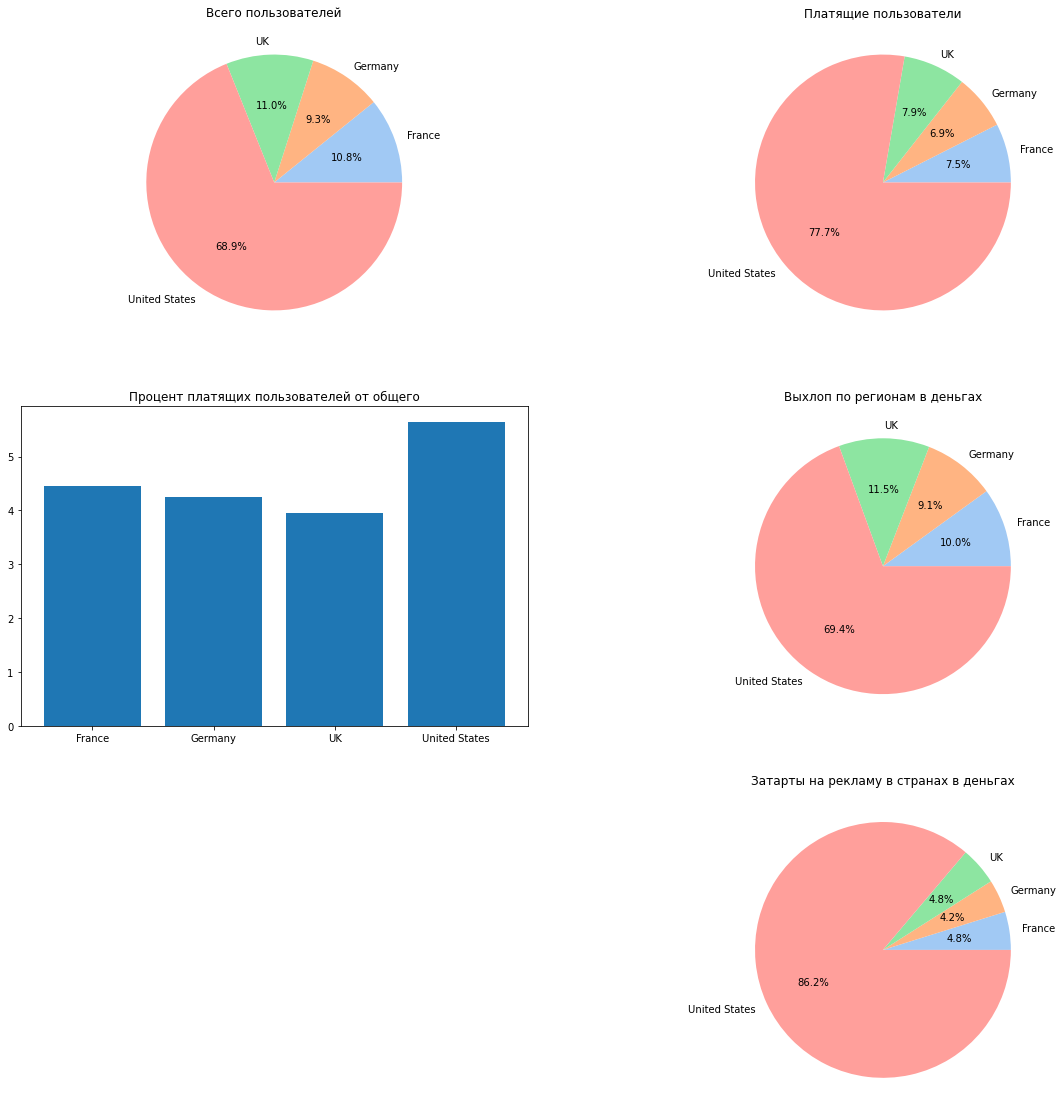

In [13]:
fig = plt.figure(figsize=(20,20))

colors = sns.color_palette('pastel')

ax1 = fig.add_subplot(3,2,1)
plt.pie(
    x = z.groupby('region')['%_count_all'].sum(),
    labels = z['region'].unique(),
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Всего пользователей')

ax2 = fig.add_subplot(3,2,2)
plt.pie(
    x = z.pivot_table(index='region', values=z.columns[5][0], aggfunc='sum').reset_index()['payer'],
    labels = z.pivot_table(index='region', values=z.columns[5][0], aggfunc='sum').reset_index()['region'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Платящие пользователи')

ax3 = fig.add_subplot(3,2,3)
plt.bar(
    x = z.pivot_table(index='region', values=z.columns[6][0], aggfunc='sum').reset_index()['region'],
    height = z.pivot_table(index='region', values=z.columns[6][0], aggfunc='median').reset_index()['']
)
plt.title('Процент платящих пользователей от общего')

ax4 = fig.add_subplot(3,2,4)
plt.pie(
    x = profiles.pivot_table(index='region', values='revenue', aggfunc='sum').reset_index()['revenue'],
    labels = profiles.pivot_table(index='region', values='revenue', aggfunc='sum').reset_index()['region'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Выхлоп по регионам в деньгах')

ax5 = fig.add_subplot(3,2,6)
plt.pie(
    x = profiles.pivot_table(index='region', values='acquisition_cost', aggfunc='sum').reset_index()['acquisition_cost'],
    labels = profiles.pivot_table(index='region', values='acquisition_cost', aggfunc='sum').reset_index()['region'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Затарты на рекламу в странах в деньгах')


plt.show()

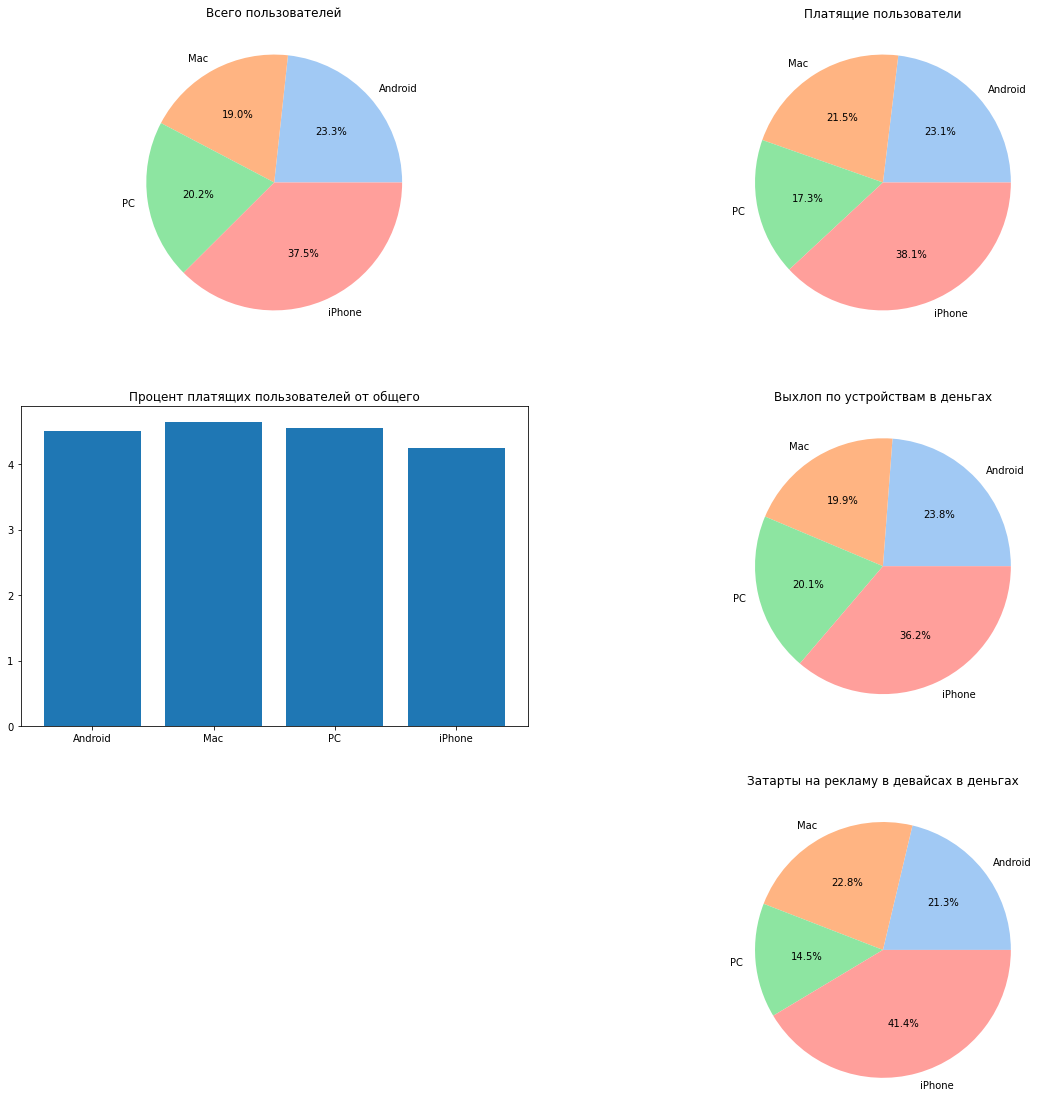

In [14]:
fig = plt.figure(figsize=(20,20))

colors = sns.color_palette('pastel')

ax1 = fig.add_subplot(3,2,1)
plt.pie(
    x = z.groupby('device')['%_count_all'].sum(),
    labels = z['device'].unique(),
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Всего пользователей')

ax2 = fig.add_subplot(3,2,2)
plt.pie(
    x = z.pivot_table(index='device', values=z.columns[5][0], aggfunc='sum').reset_index()['payer'],
    labels = z.pivot_table(index='device', values=z.columns[5][0], aggfunc='sum').reset_index()['device'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Платящие пользователи')

ax3 = fig.add_subplot(3,2,3)
plt.bar(
    x = z.pivot_table(index='device', values=z.columns[6][0], aggfunc='sum').reset_index()['device'],
    height = z.pivot_table(index='device', values=z.columns[6][0], aggfunc='median').reset_index()['']
)
plt.title('Процент платящих пользователей от общего')

ax4 = fig.add_subplot(3,2,4)
plt.pie(
    x = profiles.pivot_table(index='device', values='revenue', aggfunc='sum').reset_index()['revenue'],
    labels = profiles.pivot_table(index='device', values='revenue', aggfunc='sum').reset_index()['device'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Выхлоп по устройствам в деньгах')

ax5 = fig.add_subplot(3,2,6)
plt.pie(
    x = profiles.pivot_table(index='device', values='acquisition_cost', aggfunc='sum').reset_index()['acquisition_cost'],
    labels = profiles.pivot_table(index='device', values='acquisition_cost', aggfunc='sum').reset_index()['device'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Затарты на рекламу в девайсах в деньгах')

plt.show()

По девайсам картина почти равномерная 

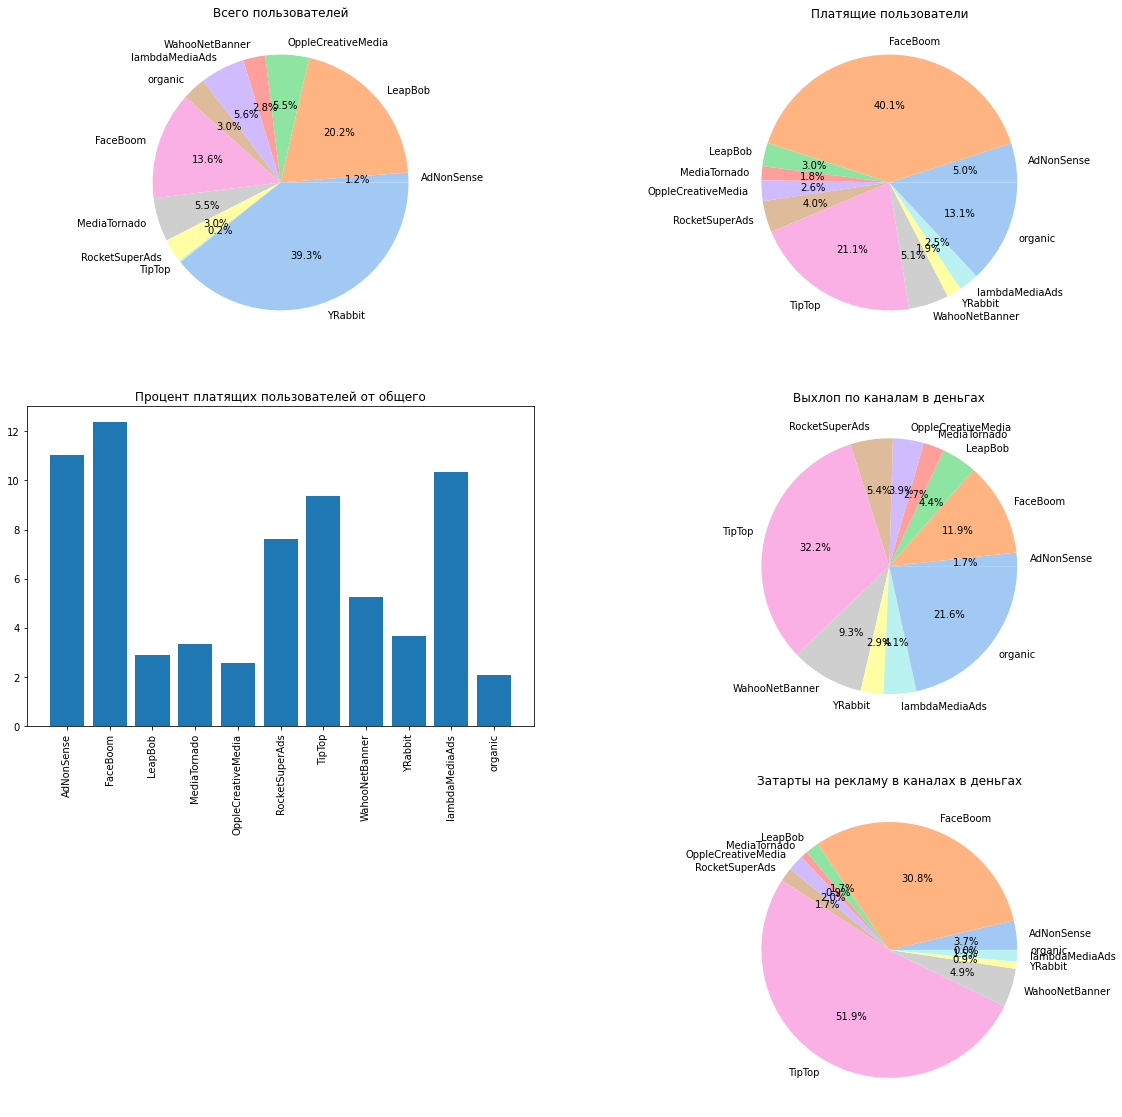

In [15]:
fig = plt.figure(figsize=(20,20))

colors = sns.color_palette('pastel')

ax1 = fig.add_subplot(3,2,1)
plt.pie(
    x = z.groupby('channel')['%_count_all'].sum(),
    labels = z['channel'].unique(),
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Всего пользователей')

ax2 = fig.add_subplot(3,2,2)
plt.pie(
    x = z.pivot_table(index='channel', values=z.columns[5][0], aggfunc='sum').reset_index()['payer'],
    labels = z.pivot_table(index='channel', values=z.columns[5][0], aggfunc='sum').reset_index()['channel'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Платящие пользователи')

ax3 = fig.add_subplot(3,2,3)
plt.bar(
    x = z.pivot_table(index='channel', values=z.columns[6][0], aggfunc='sum').reset_index()['channel'],
    height = z.pivot_table(index='channel', values=z.columns[6][0], aggfunc='median').reset_index()['']
)
plt.xticks(rotation=90)
plt.title('Процент платящих пользователей от общего')

ax4 = fig.add_subplot(3,2,4)
plt.pie(
    x = profiles.pivot_table(index='channel', values='revenue', aggfunc='sum').reset_index()['revenue'],
    labels = profiles.pivot_table(index='channel', values='revenue', aggfunc='sum').reset_index()['channel'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Выхлоп по каналам в деньгах')

ax5 = fig.add_subplot(3,2,6)
plt.pie(
    x = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='sum').reset_index()['acquisition_cost'],
    labels = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='sum').reset_index()['channel'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Затарты на рекламу в каналах в деньгах')



plt.show()

C:\Users\a.vechkanov\Anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


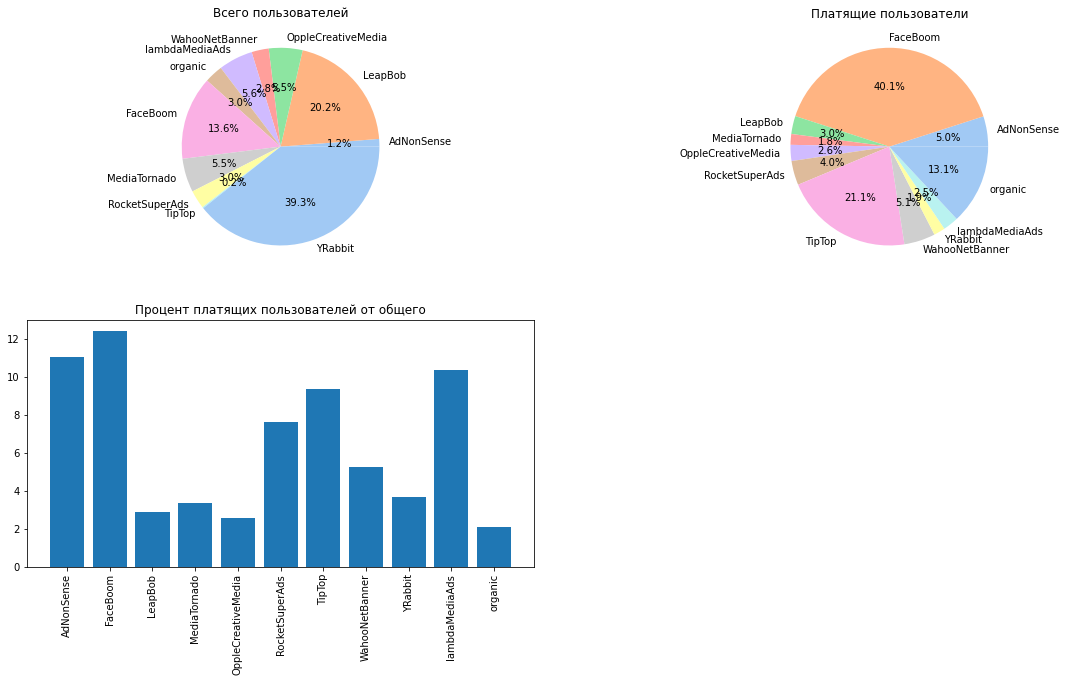

In [19]:
fig = plt.figure(figsize=(20,10))

colors = sns.color_palette('pastel')

ax1 = fig.add_subplot(2,2,1)
plt.pie(
    x = z.groupby('channel')['%_count_all'].sum(),
    labels = z['channel'].unique(),
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Всего пользователей')

ax2 = fig.add_subplot(2,2,2)
plt.pie(
    x = z.pivot_table(index='channel', values=z.columns[5][0], aggfunc='sum').reset_index()['payer'],
    labels = z.pivot_table(index='channel', values=z.columns[5][0], aggfunc='sum').reset_index()['channel'],
    colors = colors,
    autopct='%1.1f%%'
)
plt.title('Платящие пользователи')

ax2 = fig.add_subplot(2,2,3)
plt.bar(
    x = z.pivot_table(index='channel', values=z.columns[6][0], aggfunc='sum').reset_index()['channel'],
    height = z.pivot_table(index='channel', values=z.columns[6][0], aggfunc='median').reset_index()['']
)
plt.xticks(rotation=90)
plt.title('Процент платящих пользователей от общего')


plt.show()

##    Вывод по данным срезам:
    
    1 Большинство пользователей 68% с сша, большинтсов платящих пользователей 77% так же из США. Примерно 4-7% пользователей у       нас переходят в платящие, в сша это 7%, в франц, бритов и немцев это  4-5%.
      Доход по странам распределяется так же как и платящие пользователи
      Затраты на рекламу по странам распределяется так же как и платящие пользователи
    
    2 По девайсам 40% пользователей с айфоном, 40% платящих пользователей тоже с айфоном. Перех в плятящие почти одинаковый у       всех 4,5%
      Доход по девайсам распределяется так же как и платящие пользователи
      Затраты на рекламу по девайсам распределяется так же как и платящие пользователи
    
    3 По каналам привлечения 13% привлеченных клиентов с FaceBoom дают нам 40% платящих клиентов
      0,2% привлеченных клиентов с TipTop дают нам 21% платящих клиентов
      3% привлеченных  Organic дают нам 13.1% платящих клиентов      
      т.е 16,2% клиентов привлеченных через organic, tiptop и faceboom дают нам 74,1% платящих клиентов! Это 66% всех доходов
      Основные затраты приходятся на tiptop 52% и faceboom 31% это приносит нам 13,8 всех пользователей и 61% платящих               пользовтаелей и 44% доходов
      
      
      Затраты на рекламу распределяются очень неравномерно, проверим по временным срезам

Text(0.5, 1.0, 'общие доходы деньгах')

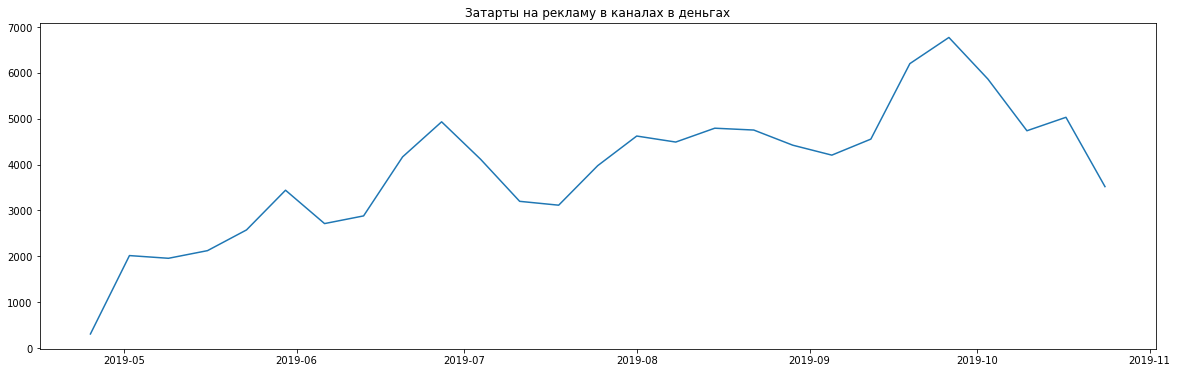

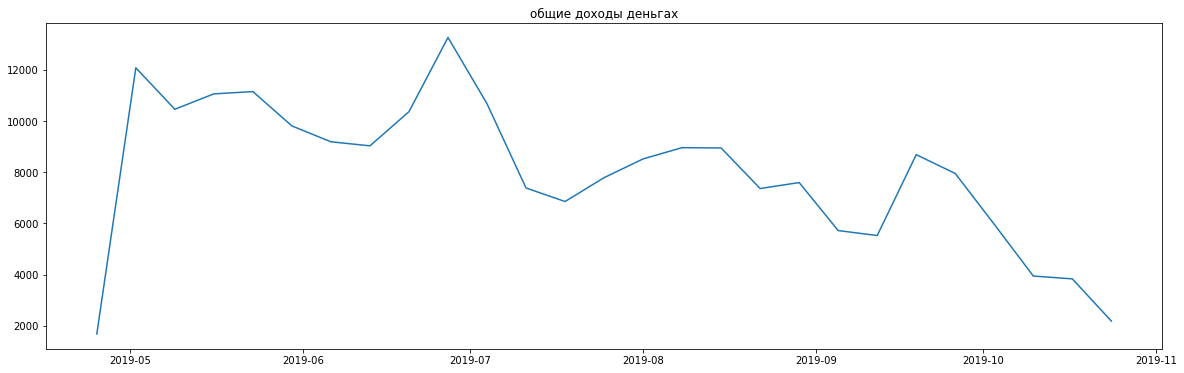

In [16]:
fig = plt.figure(figsize=(20,6))
plt.plot(
    profiles.pivot_table(index='week', values='acquisition_cost', aggfunc='sum').reset_index()['week'],
    profiles.pivot_table(index='week', values='acquisition_cost', aggfunc='sum').reset_index()['acquisition_cost']
)

plt.title('Затарты на рекламу в каналах в деньгах')

fig = plt.figure(figsize=(20,6))
plt.plot(
    profiles.pivot_table(index='week', values='revenue', aggfunc='sum').reset_index()['week'],
    profiles.pivot_table(index='week', values='revenue', aggfunc='sum').reset_index()['revenue']
)

plt.title('общие доходы деньгах')

Видим что затраты на рекламу росли, а доходы после июля начали падать

Text(0.5, 1.0, 'Доходы по каналам по недели')

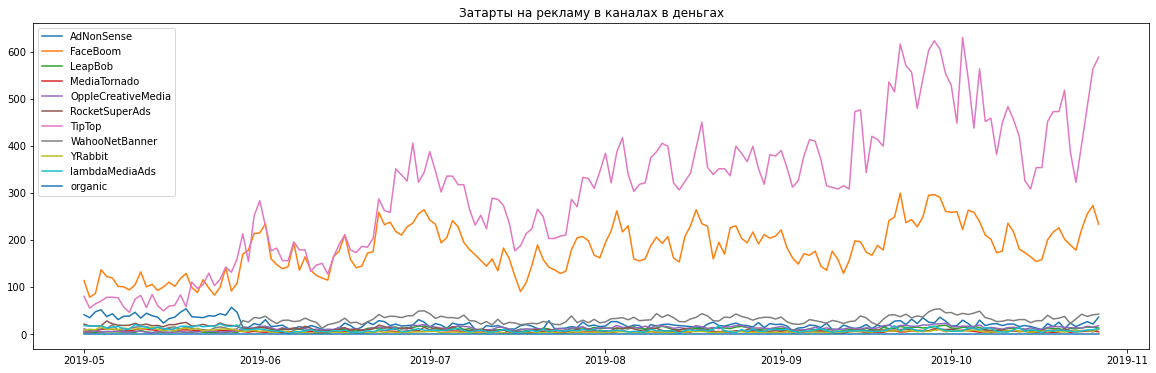

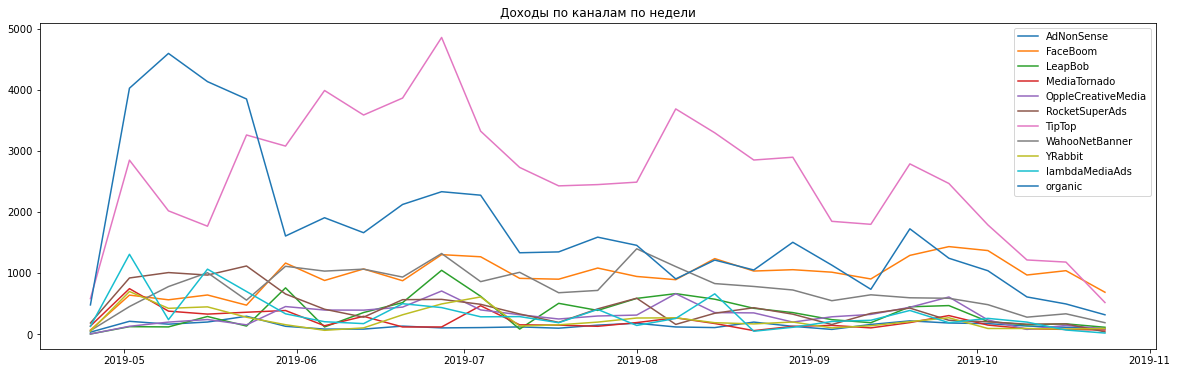

In [17]:
fig = plt.figure(figsize=(20,6))

for i in profiles.pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='sum').columns:
    plt.plot(
        profiles.pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='sum').reset_index()['dt'],
        profiles.pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='sum').reset_index()[i],
        label=i
    )
    
    

plt.legend()
plt.title('Затарты на рекламу в каналах в деньгах')

fig = plt.figure(figsize=(20,6))

for i in profiles.pivot_table(index='week', columns='channel', values='revenue', aggfunc='sum').columns:
    plt.plot(
        profiles.pivot_table(index='week', columns='channel', values='revenue', aggfunc='sum').reset_index()['week'],
        profiles.pivot_table(index='week', columns='channel', values='revenue', aggfunc='sum').reset_index()[i],
        label=i
    )

plt.legend(fontsize=10)
plt.title('Доходы по каналам по недели')

Как видим падение доходов связано со снижением доходов в каналах tiptop, думаю в этом канале основные проблемы

Text(0.5, 1.0, 'Доходы по каналам по недели')

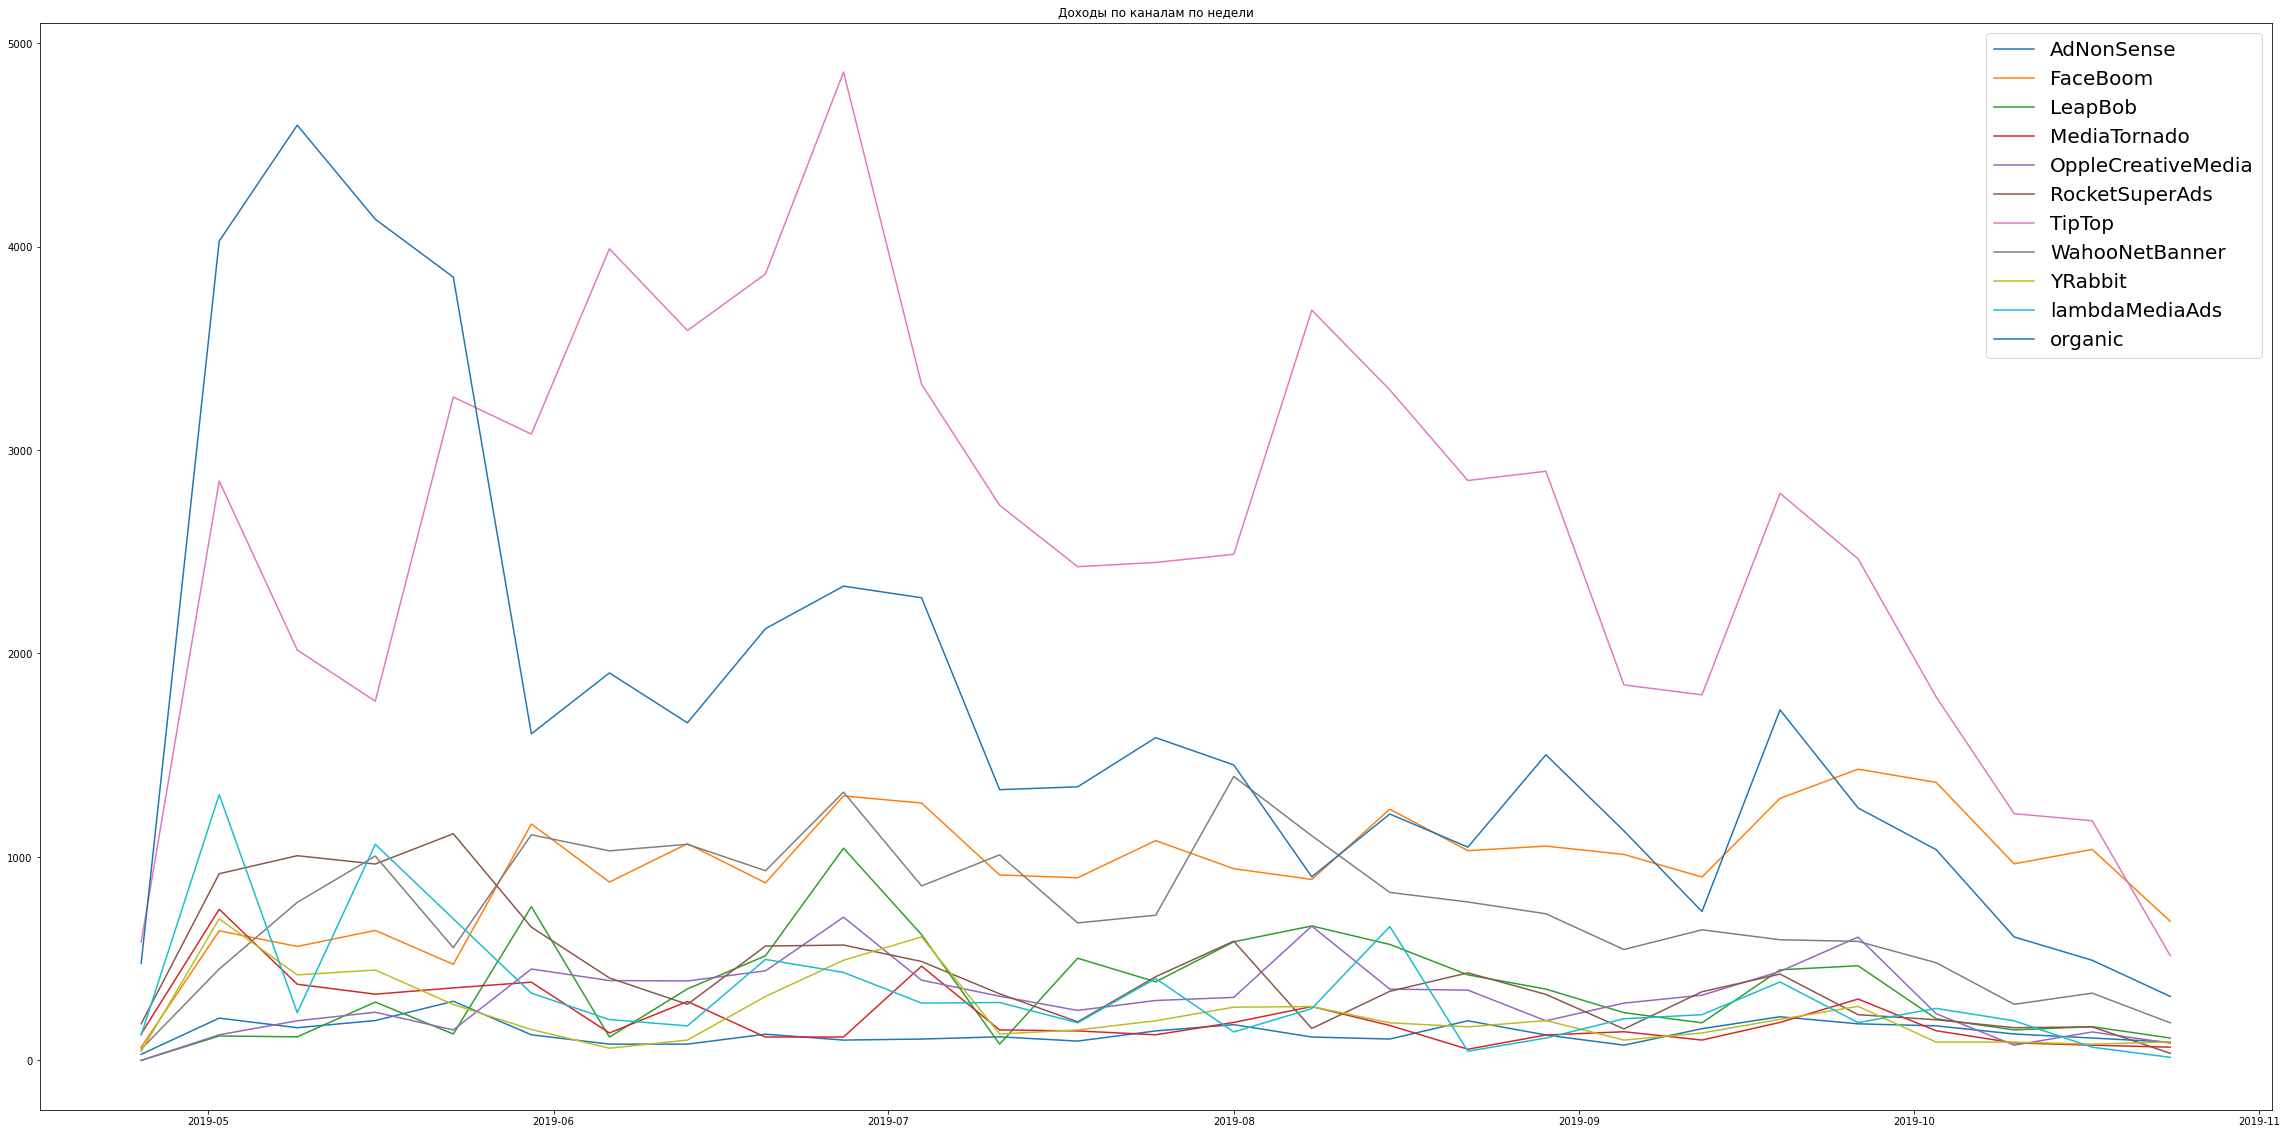

In [18]:
fig = plt.figure(figsize=(40,20))

for i in profiles.pivot_table(index='week', columns='channel', values='revenue', aggfunc='sum').columns:
    plt.plot(
        profiles.pivot_table(index='week', columns='channel', values='revenue', aggfunc='sum').reset_index()['week'],
        profiles.pivot_table(index='week', columns='channel', values='revenue', aggfunc='sum').reset_index()[i],
        label=i
    )

plt.legend(fontsize=20)
plt.title('Доходы по каналам по недели')

**Посчитаем наши основные метрики**

*Конверсия* ( CR )

Конверсия — это доля людей, перешедших из одного состояния в другое. 

В данном случае можно посчитать воронку: какой процент переходит из пользоватлеей, в пользователей которые совершили одну покупку, две, три, 4 и более 

In [20]:
count_revenue = orders.pivot_table(
    index='user_id', 
    values='revenue', 
    aggfunc='count'
        ).reset_index(
            ).rename(columns={'revenue':'count_revenue'})

count_revenue.head(3)

,user_id,count_revenue
0,599326,3
1,46006712,1
2,374052872,8


In [100]:
funnel = visits.merge(count_revenue, on='user_id', how='left')
funnel['count_revenue'] = funnel['count_revenue'].fillna(0)
funnel.head()

,user_id,region,device,channel,session_start,session_end,session_length,count_revenue
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01,0 days 00:09:00,0.0
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35,0 days 00:01:04,0.0
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08,0 days 01:22:43,0.0
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25,0 days 00:24:26,0.0
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40,0 days 00:24:05,0.0


In [111]:
funnel.query('count_revenue != 0').groupby('count_revenue')['user_id'].count().reset_index()

,count_revenue,user_id
0,1.0,5950
1,2.0,4004
2,3.0,3461
3,4.0,4253
4,5.0,5364
5,6.0,6999
6,7.0,7904
7,8.0,7753
8,9.0,8094
9,10.0,6562


Рсапределение кол-во покупок у пользователей 

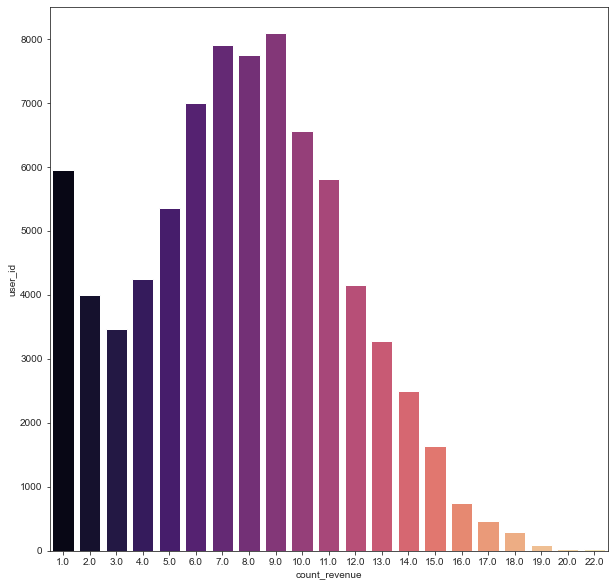

In [137]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1)

sns.set_style("ticks")

sns.barplot(x = funnel.query('count_revenue != 0').groupby('count_revenue')['user_id'].count().reset_index()['count_revenue'],
            y = funnel.query('count_revenue != 0').groupby('count_revenue')['user_id'].count().reset_index()['user_id'],
            palette = 'magma')
plt.show()

In [158]:
a=np.quantile(funnel.groupby('count_revenue')['user_id'].count().reset_index()['user_id'],
           q = 0.25)
a

965.0

In [157]:
b=np.quantile(funnel.groupby('count_revenue')['user_id'].count().reset_index()['user_id'],
           q = 0.75)
b

6409.0

In [183]:
np.quantile(c['user_id'], q = 0.75)

6409.0

In [204]:
funnel_cat = funnel.groupby('count_revenue')['user_id'].count().reset_index()
funnel_cat.head()

,count_revenue,user_id
0,0.0,230527
1,1.0,5950
2,2.0,4004
3,3.0,3461
4,4.0,4253


In [208]:
def cat(row):
    if row < np.quantile(funnel.groupby('count_revenue')['user_id'].count().reset_index()['user_id'], q = 0.25):
        return 'Кол-во покупателей с Мало покупок'
    
    elif np.quantile(funnel.groupby('count_revenue')['user_id'].count().reset_index()['user_id'], q = 0.25) < row < np.quantile(funnel.groupby('count_revenue')['user_id'].count().reset_index()['user_id'], q = 0.75):
        return 'Кол-во покупателей с нормой покупок'
    
    else:
        return 'Кол-во покупателей с Много покупок'

In [230]:
funnel_cat['category'] = funnel_cat['user_id'].apply(cat)
funnel_cat.iloc[0,2] = 'Нет покупок'
funnel_cat.head(3)

,count_revenue,user_id,category
0,0.0,230527,Нет покупок
1,1.0,5950,Кол-во покупателей с нормой покупок
2,2.0,4004,Кол-во покупателей с нормой покупок


In [234]:
funnel_cat.groupby('category')['user_id'].sum().reset_index().sort_values(by='user_id', ascending=False)

,category,user_id
3,Нет покупок,230527
2,Кол-во покупателей с нормой покупок,40413
1,Кол-во покупателей с Много покупок,37312
0,Кол-во покупателей с Мало покупок,1649


In [237]:
fig = go.Figure()
 

fig.add_trace(go.Funnel(name='Группа А',
    y = funnel_cat.groupby('category')['user_id'].sum().reset_index().sort_values(by='user_id', ascending=False)['category'], 
    x = funnel_cat.groupby('category')['user_id'].sum().reset_index().sort_values(by='user_id', ascending=False)['user_id'],
    textinfo = "value+percent initial+percent previous"))

fig.update_layout(title='Воронка',
                  yaxis_title='События',
                  height=900, width=900
                 )
fig.update_xaxes(tickangle=45)
fig.show() 

**Когортный анализ**

Когортный анализ —  можно анализировать поведение разных групп клиентов и оценивать их значимость.

In [282]:
profiles_practicum = (
    
    visits.sort_values(by = ['user_id', 'session_start'])
    .groupby('user_id')
    .agg({'session_start':'first',
          'channel':'first',
          'device':'first',
          'region':'first'})
    .rename(columns={'session_start':'first_ts'})
    .reset_index()
)

profiles_practicum['dt'] = profiles_practicum['first_ts'].astype('datetime64[D]')
profiles_practicum['month'] = profiles_practicum['first_ts'].astype('datetime64[M]')



profiles_practicum.head()

,user_id,first_ts,channel,device,region,dt,month
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01


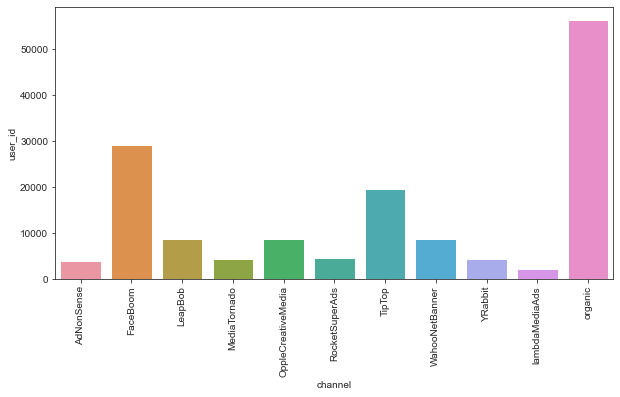

In [283]:
fig = plt.figure(figsize=(10,5))

ax= fig.add_subplot(1,1,1)

sns.barplot(
    x=profiles_practicum.groupby('channel').agg({'user_id':'nunique'}).reset_index()['channel'],
    y=profiles_practicum.groupby('channel').agg({'user_id':'nunique'}).reset_index()['user_id']
)

plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='dt'>

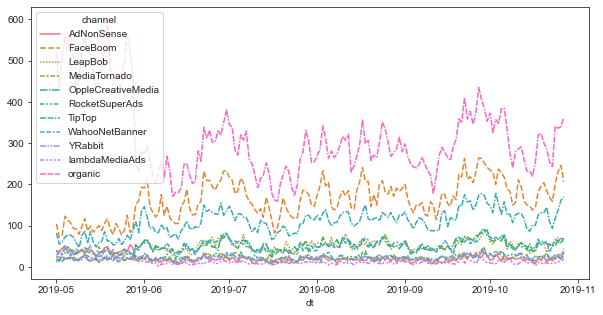

In [284]:
fig = plt.figure(figsize=(10,5))

ax= fig.add_subplot(1,1,1)

sns.lineplot(
    
    data = profiles_practicum.pivot_table(
        index='dt',
        columns='channel',
        values='user_id',
        aggfunc='nunique'
                    )
)

**Retention Rate**


Retention Rate показывает, сколько пользователей из когорты относительно их изначального числа вернулись

In [286]:
profiles_practicum.head()

,user_id,first_ts,channel,device,region,dt,month
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01


In [ ]:
result_raw = profiles_practicum.merge(
        visits
)

**Churn Rate**

Churn Rate — какой процент пользователей прекращает использовать сервис с течением времени.

**LTV**

LTV, или Lifetime Value, — это «пожизненная ценность» клиента, то есть общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок. В теории эта метрика включает все прошлые, нынешние и будущие покупки пользователя. На практике чаще анализируют LTV за определённый срок — первые 1, 3, 7 и 14 дней после регистрации.

    Есть несколько способов расчета LTV. Чем сложнее формула, тем более приближенным к реальности получается результат, т.к. меньше погрешности.
    Формула расчета LTV 1

    LTV = (доход от клиента) – (затраты на привлечение и удержание клиента)
    Формула расчета LTV 2

    LTV = (средняя стоимость продажи) * (среднее число продаж в месяц) * (сколько месяцев удерживается клиент)
    Формула расчета LTV 3

    LTV = ((T * AOV) * AGM) * ALT,

    где Т — среднее количество продаж (заказов) в месяц

    AOV — средний чек

    AGM — доля прибыли в выручке

    ALT — средняя продолжительность взаимодействия клиента с компанией (в месяцах)

    Мы рекомендуем рассчитать LTV по каждой из формул и вывести среднее значение на основе всех результатов.

In [28]:
profiles.pivot_table(index='dt', values='user_id', aggfunc='nunique')

,user_id
dt,
2019-05-01,909
2019-05-02,758
2019-05-03,849
2019-05-04,1015
2019-05-05,970
...,...
2019-10-23,739
2019-10-24,940
2019-10-25,1021
